----
# LDA classification using sklearn library different prior
With LDA for dimensionality reduction to 5 dimensions

----

In [67]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import confusion_matrix as skconfmatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set correct working directory
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../Python")

# Import files from /Python directory
from confusion_matrix import confusion_matrix
"""
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})
"""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'\nplt.rcParams.update({\n    "text.usetex": True,\n    "font.family": "cmr"\n})\n'

In [68]:
# Use noisy data sets
noise = False

# Load data sets
trn_data = pd.read_csv(f"../TrainingData/neodata/soltani_all_{'' if noise else 'no'}noise_1200.csv")
vld_data = pd.read_csv(f"../ValidationData/neodata/soltani_all_{'' if noise else 'no'}noise_1200.csv")
tst_data = pd.read_csv(f"../TestData/neodata/soltani_all_{'' if noise else 'no'}noise_100.csv")

# Separate into data and targets
y_trn = trn_data.pop('target')
X_trn = trn_data

y_vld = vld_data.pop('target')
X_vld = vld_data

y_tst = tst_data.pop('target')
X_tst = tst_data



## Standardize data

In [69]:
# Use standard scaler for scaling
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()

# # Use PCA sphering/whitening for scaling
# from sklearn.decomposition import PCA
# standardizer = PCA(whiten=True)

X_trn = standardizer.fit_transform(X_trn)
X_vld = standardizer.transform(X_vld)
X_tst = standardizer.transform(X_tst)

## LDA dimensionality reduction

In [70]:
import lda

reducer = lda.reducer(X_trn,y_trn,5)

X_vld = reducer.transform(X_vld)
X_tst = reducer.transform(X_tst)
X_trn = reducer.transform(X_trn)




Preserving 99.71% of variance


---

# LDA fitting

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

import csv

from sklearn.metrics import confusion_matrix as cf

#Making a header to be written to a file
header=['prior for non faulty data', 'accuracy','false positive']

#Opening the file to be written to
f = open('acc_prior_change.csv', 'w', encoding='UTF8', newline='' )
writer = csv.writer(f)
# write the header
writer.writerow(header)


   
#Making a for loop to use different priors. 
for x in np.arange(0, 1.001, 0.001):

    #definer priors
    non_fault_prior=x
    fault_prior=(1-non_fault_prior)/20
    prior=np.array([non_fault_prior, fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,])

    #Training LDA classifier with priors 
    clf = LinearDiscriminantAnalysis(priors=prior)
    clf.fit(X_trn, y_trn)

    #Predication and calucting accuracy score
    pred=clf.predict(X_trn)
    
    
    #Calcultating false positive score
    cond = cf(y_trn,pred)
    
    false = 1-cond[0,0]/1200 
    #Cacultating accuarcy 
    ac=accuracy_score(y_trn, pred)
    #Writing to a file
    res=[x,ac,false]
    writer.writerow(res)
     


f.close()



c:\Users\is123\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:524: RuntimeWarning: divide by zero encountered in log
  self.intercept_ = -0.5 * np.sum(coef**2, axis=1) + np.log(self.priors_)
c:\Users\is123\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:517: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = (S**2 / np.sum(S**2))[
c:\Users\is123\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:524: RuntimeWarning: divide by zero encountered in log
  self.intercept_ = -0.5 * np.sum(coef**2, axis=1) + np.log(self.priors_)


# Classifying test data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'LDA5-LDA different priori on test set : Accuracy 76.19%'}, xlabel='Predicted class', ylabel='True class'>)

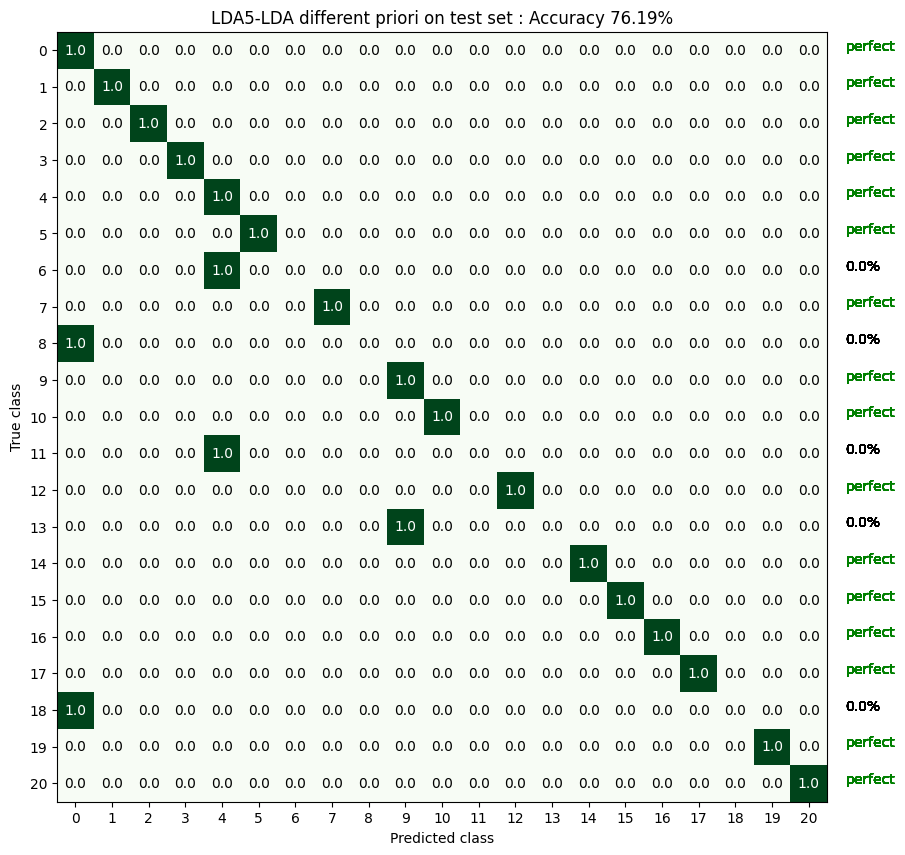

In [72]:
#Using a found good prior and testning the outcome on the test data. 

#Chosing prior and training the 5LDA classifier
non_fault_prior=0.052
fault_prior=(1-non_fault_prior)/20
prior=np.array([non_fault_prior, fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,fault_prior,])

clf = LinearDiscriminantAnalysis(priors=prior)
clf.fit(X_trn, y_trn)


# Make predictions for the training set
y_hat_tst = clf.predict(X_tst)

#plot the confusion matrix
conf_matrix_tst = skconfmatrix(y_tst,y_hat_tst)
confusion_matrix(conf_matrix_tst, figsize = (10,10),title='LDA5-LDA different priori on test set', save_fig_name='LDA5-LDA different prior test confusion matrix.pdf')